In [3]:
# Initialisation
if __name__=='__main__':
    %run '../ruaridhsNotebookPrettifier.ipy'
    %run '../ruaridhsNotebookInitialiser.ipy'
else:
    import numpy as np
    import matplotlib.pyplot as plt

"improved" the css


toggled the visibility of header and toolbar
imported pandas as pd | imported numpy as np | imported ruaridhsNotebookImporter | imported matplotlib.pyplot as plt and changed visual style to 'ggplot' | set matplotlib plots to display inline at retina resolution | imported nitpick.plots as nplt | imported bokeh.charts and bokeh.plotting as bkc and bkp | 

Loading BokehJS ...

# Generate A Collection Of Datasets

In [5]:
def scatterPlot(listsOf2DCoords):
    """
    Plots a list of 2D points such as [[x1,y1],[x2,y2],[x3,y3],[x4,y4]].
    The input can be a single list of coordinates as above or a list of such lists such as:
    [ [[x1,y1],[x2,y2],[x3,y3],[x4,y4]],
      [[a1,b1],[a2,b2],[a3,b3],[a4,b4]],
      [[u1,v1],[u2,v2],[u3,v3],[u4,v4]] ]
    In this case each seperate list will be assigned a unique color.
    """
    if len(np.asarray(listsOf2DCoords).shape) == 2:
        listsOf2DCoords = np.asarray([listsOf2DCoords])
    plt.figure(figsize=(17,8))
    plt.axes(aspect='equal')
    colorStep = 1.0/max(len(listsOf2DCoords)-1,1)
    for i,coords in enumerate(listsOf2DCoords):
        plt.scatter(coords[:,0],coords[:,1],marker='.',alpha=0.8,color=plt.cm.Set1(i*colorStep))

In [6]:
def datasetPlot(dataset,labels):
    """dataset: list of 2D coordinates
    labels: a one hot encoded array for each coordinate in dataset indicating which class that coordinate belongs to
    This plots a dataset, with a unique color for each class."""
    sortedData = []
    for i in range(labels.shape[-1]):
        sortedData.append(dataset[(labels == 1)[:,i]])
    scatterPlot(sortedData)

In [10]:
def coordToDataset(*coords):
    """Input: one or more lists of data samples (nD vectors), with each list being a different class
    Output: ('dataset','dataset_labels') """
    dataDimension = coords[0].shape[1]
    allDataAndLabels=[]
    for i,data in enumerate(coords):
        labels=np.zeros([len(data),len(coords)])
        labels[:,i] = 1.
        allDataAndLabels.append(np.hstack([data,labels]))
    allDataAndLabels = np.vstack(allDataAndLabels).astype(np.float32)
    np.random.shuffle(allDataAndLabels)
    return np.split(allDataAndLabels,[dataDimension],axis=1)

### Two gaussian clouds

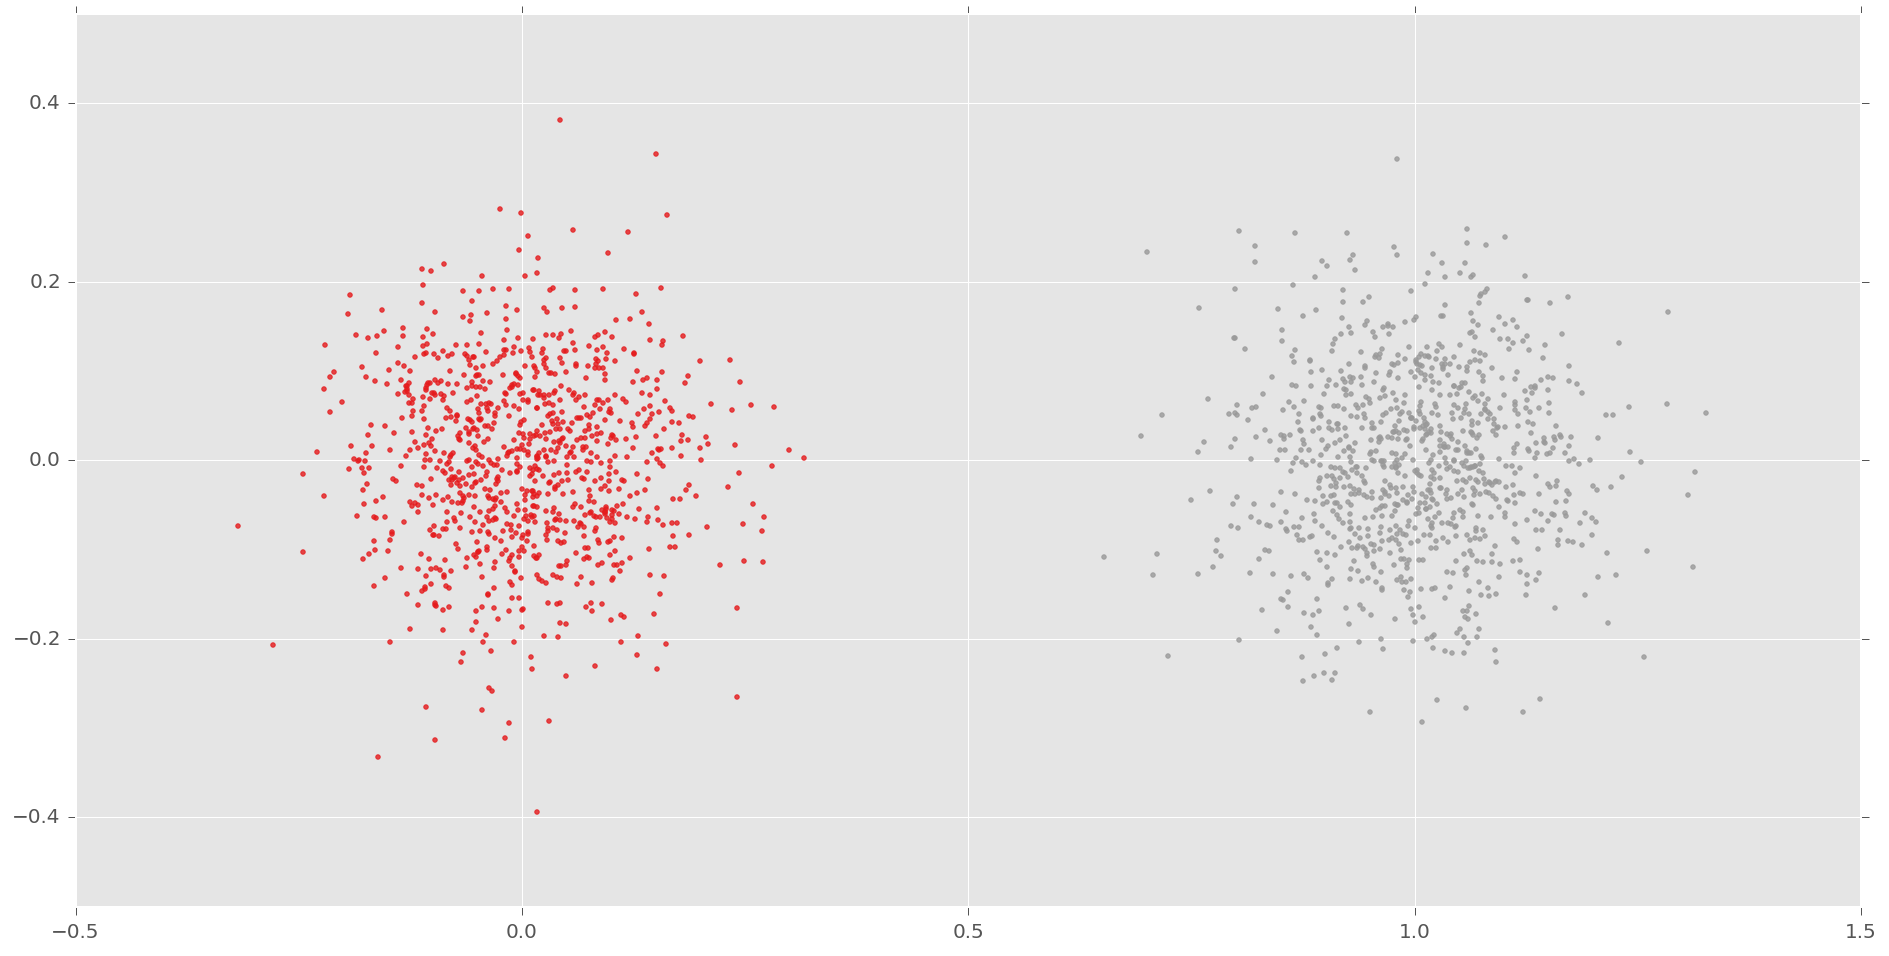

In [8]:
simple_all=np.hstack([
     np.vstack([
            np.random.normal([0,0],0.1,[1000,2]),
            np.random.normal([1,0],0.1,[1000,2])]),
     np.array([[1.0,0.0]]*1000+[[0.0,1.0]]*1000)])
simple_all = simple_all.astype(np.float32)
np.random.shuffle(simple_all)

simple_dataset = simple_all[:,[0,1]]
simple_labels = simple_all[:,[2,3]]

datasetPlot(simple_dataset,simple_labels)

### Ring

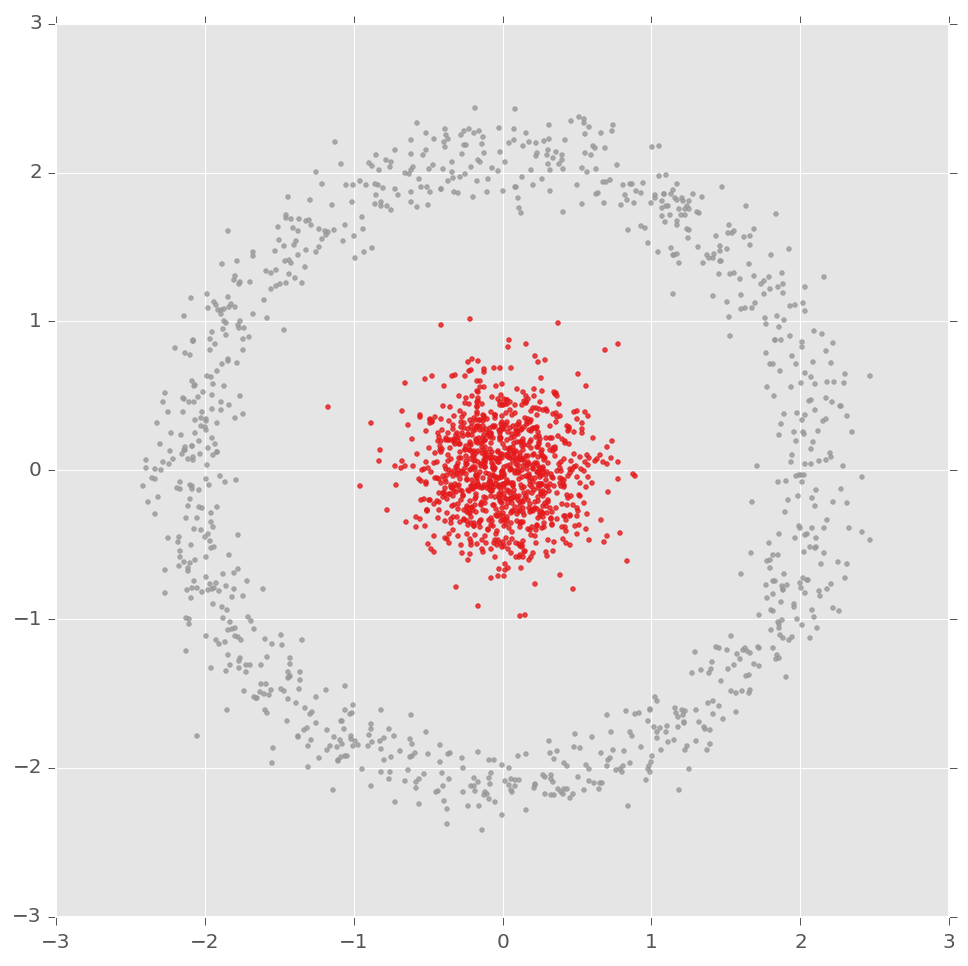

In [11]:
center=np.random.normal([0,0],0.3,[1000,2])

randomAngles = np.random.random(1000)*2*np.pi
randomCoords = np.atleast_2d(np.random.normal(2.1,0.15,1000)).T*np.vstack([np.cos(randomAngles),np.sin(randomAngles)]).T
ring_dataset,ring_labels = coordToDataset(center,randomCoords)

datasetPlot(ring_dataset,ring_labels)

### XOR

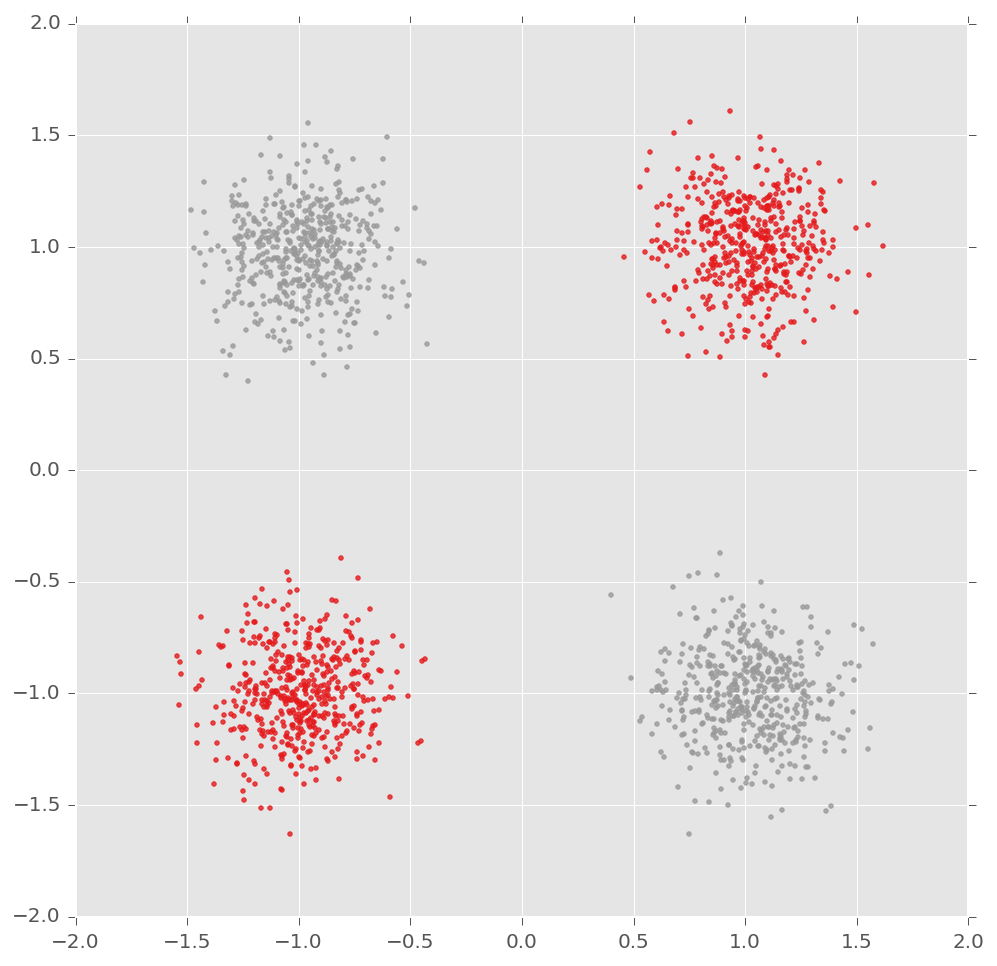

In [12]:
class1 = np.vstack([np.random.normal(-1,0.2,[500,2]),np.random.normal(1,0.2,[500,2])])
class2 = np.vstack([
        np.vstack([np.random.normal(-1,0.2,500),np.random.normal(1,0.2,500)]).T,
        np.vstack([np.random.normal(1,0.2,500),np.random.normal(-1,0.2,500)]).T])

xor_dataset,xor_labels = coordToDataset(class1,class2)
datasetPlot(xor_dataset,xor_labels)

### Wiggly

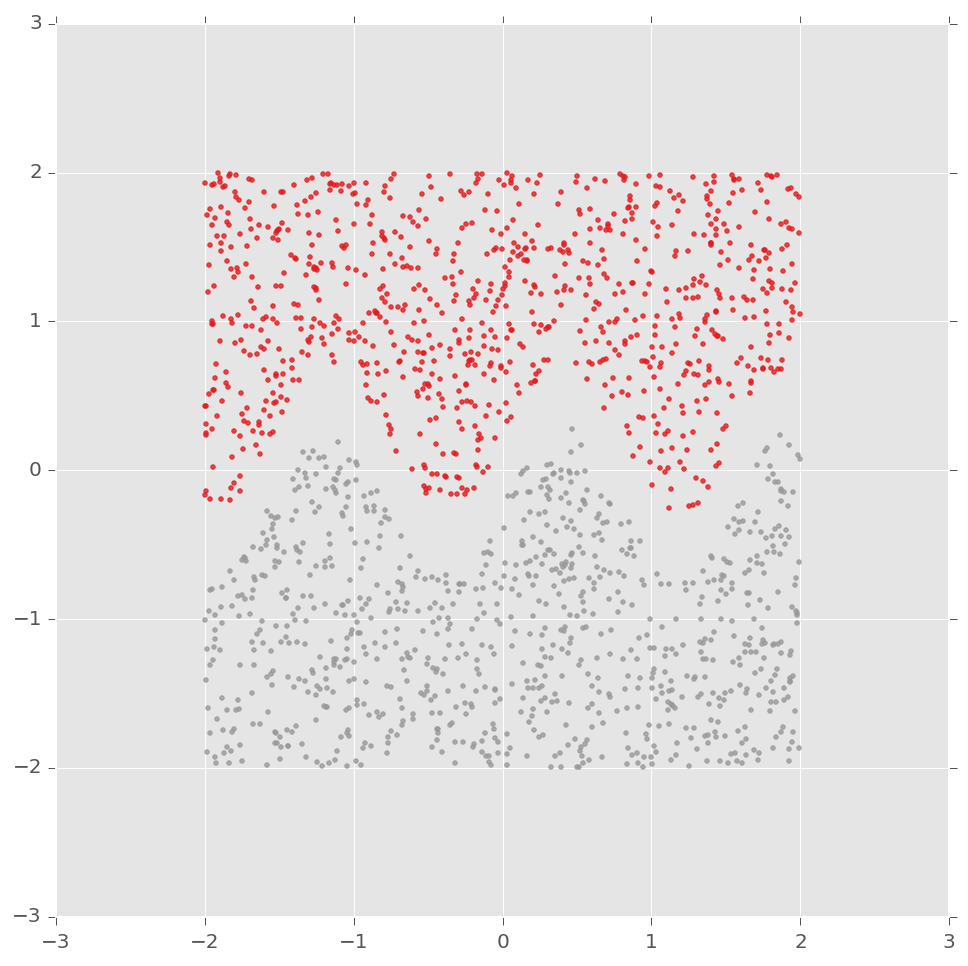

In [13]:
class1 = np.random.random([2000,2])*4-2
class2 = np.random.random([2000,2])*4-2

class1 = np.asarray([coord for coord in class1 if coord[1]>(0.5*np.sin(4*coord[0])+0.2)])
class2 = np.asarray([coord for coord in class2 if coord[1]<(0.5*np.sin(4*coord[0])-0.2)])

wiggly_dataset,wiggly_labels = coordToDataset(class1,class2)

datasetPlot(wiggly_dataset,wiggly_labels)

### Ring 2

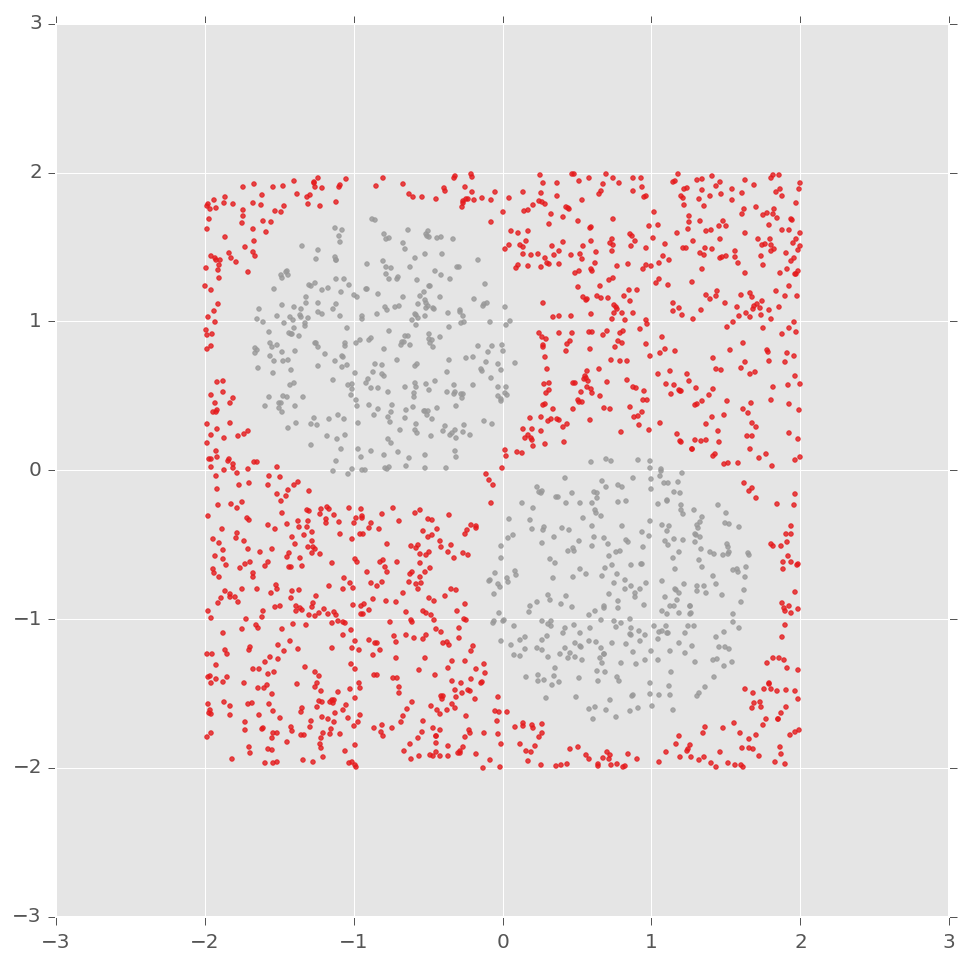

In [14]:
class1 = np.random.random([2000,2])*4-2
class1 = np.asarray([coord for coord in class1 if (coord[0]-0.8)**2+(coord[1]+0.8)**2>1.1])
class1 = np.asarray([coord for coord in class1 if (coord[0]+0.8)**2+(coord[1]-0.8)**2>1.1])

class2 = np.random.random([2000,2])*4-2
class2 = np.asarray([coord for coord in class2 if (coord[0]-0.8)**2+(coord[1]+0.8)**2<0.8 or (coord[0]+0.8)**2+(coord[1]-0.8)**2<0.8])

ring2_dataset,ring2_labels = coordToDataset(class1,class2)

datasetPlot(ring2_dataset,ring2_labels)

### Concentric

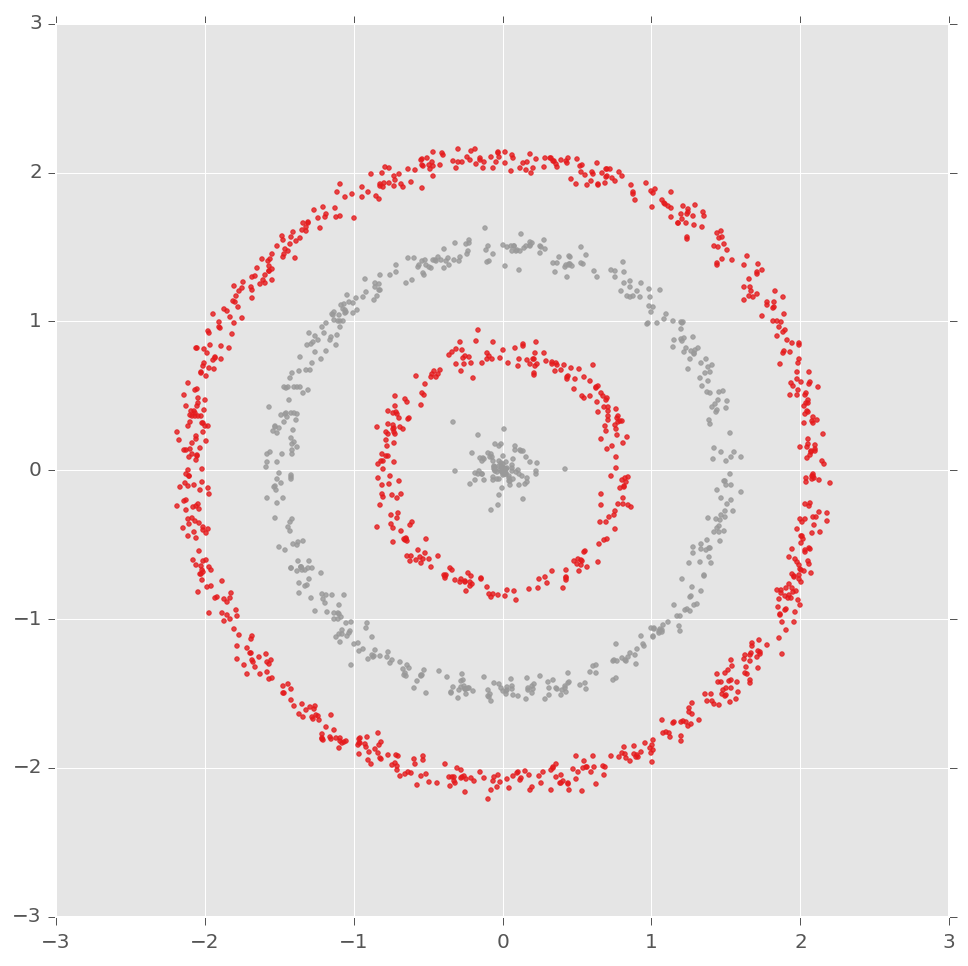

In [15]:
randomAngles = np.random.random(750)*2*np.pi
randomCoords = np.atleast_2d(np.random.normal(2.1,0.05,750)).T*np.vstack([np.cos(randomAngles),np.sin(randomAngles)]).T

randomAngles = np.random.random(250)*2*np.pi
class1 = np.append(randomCoords,np.atleast_2d(np.random.normal(0.8,0.05,250)).T*np.vstack([np.cos(randomAngles),np.sin(randomAngles)]).T,axis=0)

randomAngles = np.random.random(500)*2*np.pi
randomCoords = np.atleast_2d(np.random.normal(1.5,0.05,500)).T*np.vstack([np.cos(randomAngles),np.sin(randomAngles)]).T

randomAngles = np.random.random(100)*2*np.pi
class2 = np.append(randomCoords,np.atleast_2d(np.random.normal(0,0.15,100)).T*np.vstack([np.cos(randomAngles),np.sin(randomAngles)]).T,axis=0)

concentric_dataset,concentric_labels = coordToDataset(class1,class2)
datasetPlot(concentric_dataset,concentric_labels)

### Super Wiggly

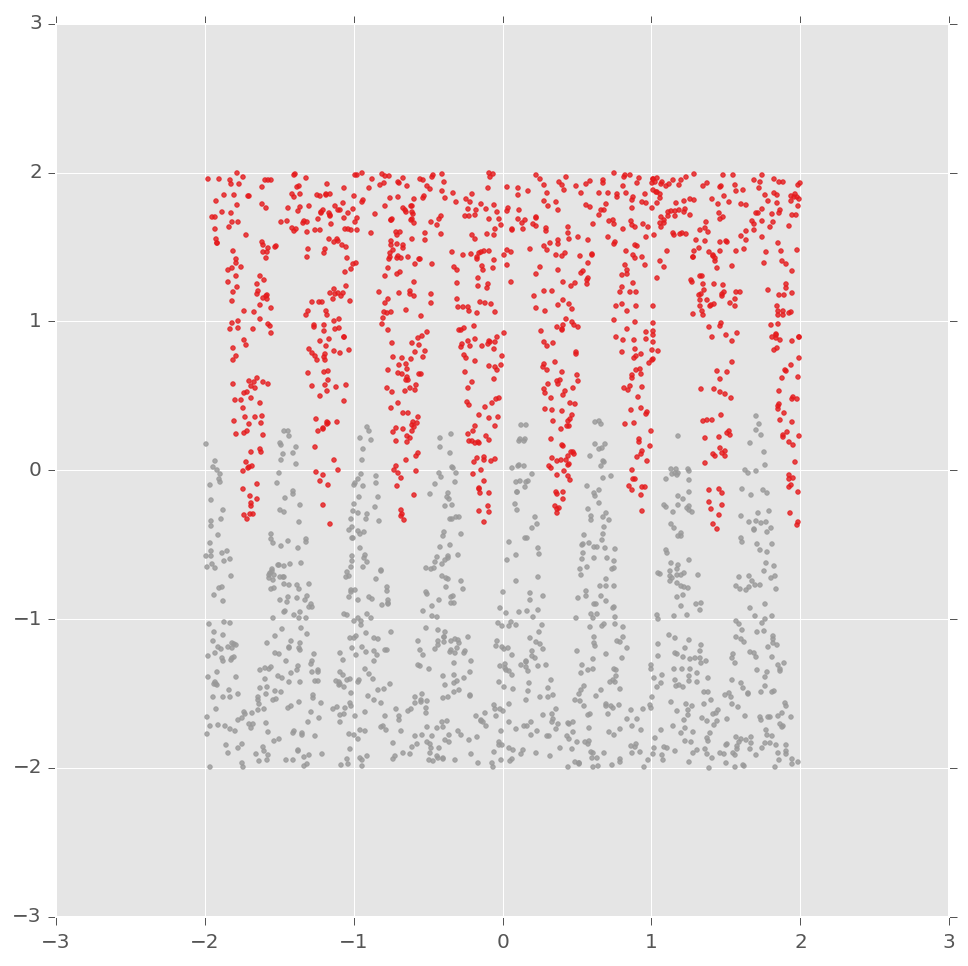

In [16]:
class1 = np.random.random([3000,2])*4-2
class2 = np.random.random([3000,2])*4-2

class1 = np.asarray([coord for coord in class1 if coord[1]>(np.sin(12*coord[0])+0.6)])
class2 = np.asarray([coord for coord in class2 if coord[1]<(np.sin(12*coord[0])-0.6)])

superwiggly_dataset,superwiggly_labels = coordToDataset(class1,class2)

datasetPlot(superwiggly_dataset,superwiggly_labels)